### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


### Get Data

In [2]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


### Data Visualization

In [3]:
for i, row in df.iterrows():
    value = 0
    if row['y'] == 1:
        value = 1
    df.at[i, 'y'] = value

In [4]:
dfy = df.groupby("y")
df1 = dfy.get_group(1)
df0 = dfy.get_group(0)
X1 = df1.iloc[:,1:179].values
X0 = df0.iloc[:,1:179].values

In [5]:
avg1 = X1.mean(axis = 0)
avg0 = X0.mean(axis = 0)

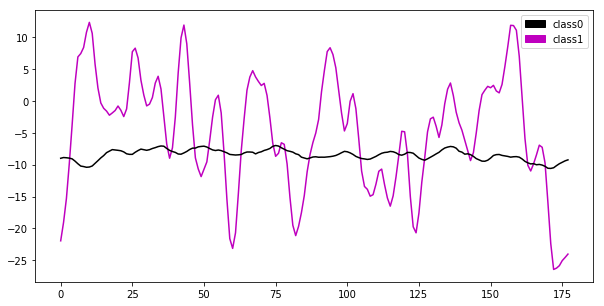

In [6]:
black = mpatches.Patch(color='k', label = 'class0')
magenta = mpatches.Patch(color='m', label = 'class1')
plt.figure(figsize = (10, 5))
plt.legend(handles = [black, magenta])
plt.plot(avg1, 'm', avg0, 'k')

### Separate Labels from Data

In [7]:
X = df.iloc[:,1:179].values

In [8]:
Y = df.iloc[:,179].values

### Split Into Train/Test Sets

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

### SVM

In [10]:
svm = SVC()
C = [0.001, .01, .1, 1, 10]
gamma = ['scale', .001, .01, .1, 1]
params = {'C': C, 'gamma': gamma}
svm = GridSearchCV(svm, params, cv = 3)
svm.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
print('best parameters: ', svm.best_params_)
C_val = svm.best_params_.get('C')
gamma_val = svm.best_params_.get('gamma')
svm = SVC(C = C_val, gamma = gamma_val)
svm.fit(X_train, Y_train)
acc_svm_train = svm.score(X_train, Y_train) * 100
print('training accuracy: ', acc_svm_train)
acc_svm = svm.score(X_test, Y_test) * 100
print('testing accuracy: ', acc_svm)

best parameters:  {'C': 10, 'gamma': 'scale'}
training accuracy:  99.80434782608695
testing accuracy:  97.78260869565217


### Linear SVM

In [12]:
linear_svm = LinearSVC()
C = [0.001, .01, .1, 1, 10]
params = {'C': C}
linear_svm = GridSearchCV(linear_svm, params, cv = 3)
linear_svm.fit(X_train, Y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number o

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
print('best parameters: ', linear_svm.best_params_)
C_val = linear_svm.best_params_.get('C')
linear_svm = LinearSVC(C = C_val)
linear_svm.fit(X_train, Y_train)
acc_linear_svm_train = linear_svm.score(X_train, Y_train) * 100
print('training accuracy: ', acc_linear_svm_train)
acc_linear_svm = linear_svm.score(X_test, Y_test) * 100
print('testing accuracy: ', acc_linear_svm)

best parameters:  {'C': 0.001}
training accuracy:  83.77173913043478
testing accuracy:  85.04347826086956


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### KNN

In [14]:
knn = KNeighborsClassifier()
k_vals = {'n_neighbors': np.arange(1, 15)}
knn = GridSearchCV(knn, k_vals, cv = 3)
knn.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
print('best parameters: ', knn.best_params_)
neighbs = knn.best_params_.get('n_neighbors')
knn = KNeighborsClassifier(n_neighbors = neighbs)
knn.fit(X_train, Y_train)
acc_knn_train = knn.score(X_train, Y_train) * 100
print('training accuracy: ', acc_knn_train)
acc_knn = knn.score(X_test, Y_test) * 100
print('testing accuracy: ', acc_knn)

best parameters:  {'n_neighbors': 1}
training accuracy:  100.0
testing accuracy:  95.26086956521739


### Decision Tree

In [16]:
dt = DecisionTreeClassifier()
params = {'max_depth': np.arange(1, 15), 'criterion': ['entropy', 'gini']}
dt = GridSearchCV(dt, params, cv = 3)
dt.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print('best parameters: ', dt.best_params_)
depth = dt.best_params_.get('max_depth') 
cr = dt.best_params_.get('criterion')
dt = DecisionTreeClassifier(max_depth = depth, criterion = cr)
dt.fit(X_train, Y_train)
acc_dt_train = dt.score(X_train, Y_train) * 100
print('training accuracy: ', acc_dt_train)
acc_dt = dt.score(X_test, Y_test) * 100
print('testing accuracy: ', acc_dt)

best parameters:  {'criterion': 'entropy', 'max_depth': 13}
training accuracy:  98.98913043478261
testing accuracy:  94.47826086956522


### LDA

In [18]:
lda = LinearDiscriminantAnalysis()
params = {'solver': ['svd', 'lsqr', 'eigen']}
lda = GridSearchCV(lda, params, cv = 3)
lda.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'solver': ['svd', 'lsqr', 'eigen']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
print('best parameters: ', lda.best_params_)
sol = lda.best_params_.get('solver')
lda = LinearDiscriminantAnalysis(solver = sol)
lda.fit(X_train, Y_train)
acc_lda_train = lda.score(X_train, Y_train) * 100
print('training accuracy: ', acc_lda_train)
acc_lda = lda.score(X_test, Y_test) * 100
print('testing accuracy: ', acc_lda)

best parameters:  {'solver': 'svd'}
training accuracy:  83.04347826086956
testing accuracy:  82.86956521739131


### Random Forest

In [20]:
paramfeat = {'max_features':['sqrt', 'log2'], 'criterion': ['gini', 'entropy']}
rf = RandomForestClassifier(n_estimators=1024)
rf = GridSearchCV(rf, paramfeat, cv=3)
rf.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1024, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
print('best parameters: ', rf.best_params_)
feats = rf.best_params_.get('max_features') 
cr = rf.best_params_.get('criterion')
rf = RandomForestClassifier(max_features = feats, criterion = cr)
rf.fit(X_train, Y_train)
acc_rf_train = rf.score(X_train, Y_train) * 100
print('training accuracy: ', acc_rf_train)
acc_rf = rf.score(X_test, Y_test) * 100
print('testing accuracy: ', acc_rf)

best parameters:  {'criterion': 'gini', 'max_features': 'sqrt'}


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training accuracy:  99.90217391304348
testing accuracy:  97.30434782608695


### ANN

In [22]:
ann1 = Sequential()
ann1.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178))
ann1.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
ann1.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
ann1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann1.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

W0312 11:08:23.715127 4508984768 deprecation_wrapper.py:119] From /Applications/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=178, units=80, kernel_initializer="uniform")`
  
W0312 11:08:23.732647 4508984768 deprecation_wrapper.py:119] From /Applications/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0312 11:08:23.734588 4508984768 deprecation_wrapper.py:119] From /Applications/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/Applications/anaconda3/lib/python3.7/si

Epoch 1/100
9200/9200 [==============================] - 1s 91us/step - loss: 0.4393 - acc: 0.8501
Epoch 2/100
9200/9200 [==============================] - 1s 68us/step - loss: 0.2837 - acc: 0.9401: 0s - loss: 0.3091 - acc: 0 - ETA: 0s - loss: 0.2872 - acc: 0.94
Epoch 3/100
9200/9200 [==============================] - 1s 69us/step - loss: 0.2234 - acc: 0.9523
Epoch 4/100
9200/9200 [==============================] - 1s 64us/step - loss: 0.1796 - acc: 0.9592
Epoch 5/100
9200/9200 [==============================] - 1s 68us/step - loss: 0.1454 - acc: 0.9637
Epoch 6/100
9200/9200 [==============================] - 1s 68us/step - loss: 0.1213 - acc: 0.9690
Epoch 7/100
9200/9200 [==============================] - 1s 68us/step - loss: 0.1229 - acc: 0.9672
Epoch 8/100
9200/9200 [==============================] - 1s 68us/step - loss: 0.0976 - acc: 0.9764
Epoch 9/100
9200/9200 [==============================] - 1s 68us/step - loss: 0.0827 - acc: 0.9798
Epoch 10/100
9200/9200 [====================

9200/9200 [==============================] - 1s 68us/step - loss: 0.0133 - acc: 0.9966
Epoch 78/100
9200/9200 [==============================] - 1s 68us/step - loss: 0.0245 - acc: 0.9935
Epoch 79/100
9200/9200 [==============================] - 1s 68us/step - loss: 0.0163 - acc: 0.9957
Epoch 80/100
9200/9200 [==============================] - 1s 67us/step - loss: 0.0175 - acc: 0.9947
Epoch 81/100
9200/9200 [==============================] - 1s 63us/step - loss: 0.0152 - acc: 0.9966
Epoch 82/100
9200/9200 [==============================] - ETA: 0s - loss: 0.0163 - acc: 0.995 - 1s 66us/step - loss: 0.0155 - acc: 0.9955
Epoch 83/100
9200/9200 [==============================] - 1s 65us/step - loss: 0.0196 - acc: 0.9939
Epoch 84/100
9200/9200 [==============================] - 1s 67us/step - loss: 0.0097 - acc: 0.9978
Epoch 85/100
9200/9200 [==============================] - 1s 63us/step - loss: 0.0252 - acc: 0.9932
Epoch 86/100
9200/9200 [==============================] - 1s 67us/step - lo

In [23]:
Y_pred1 = ann1.predict(X_test)
Y_pred1[Y_pred1 > 0.5] = 1
Y_pred1[Y_pred1 <= 0.5] = 0
acc_ann1 = accuracy_score(Y_test, Y_pred1) * 100
print('testing accuracy: ', acc_ann1)

testing accuracy:  95.43478260869566


In [24]:
ann2 = Sequential()
ann2.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178))
ann2.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
ann2.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
ann2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
ann2.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=178, units=80, kernel_initializer="uniform")`
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
9200/9200 [==============================] - 1s 79us/step - loss: 0.2015 - acc: 0.7987
Epoch 2/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 3/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 4/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 5/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 6/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 7/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.2012 - acc: 0.7988
Epoch 8/100
9200/9200 [==============================] - 1s 61us/step - loss: 0.2011 - acc: 0.7988
Epoch 9/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 10/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.2012 - acc: 0.7988
Epoch 11/

9200/9200 [==============================] - 1s 58us/step - loss: 0.2012 - acc: 0.7988
Epoch 83/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.2012 - acc: 0.7988
Epoch 84/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 85/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 86/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.2012 - acc: 0.7988
Epoch 87/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2012 - acc: 0.7988
Epoch 88/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.2012 - acc: 0.7988
Epoch 89/100
9200/9200 [==============================] - 1s 56us/step - loss: 0.2012 - acc: 0.7988
Epoch 90/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.2012 - acc: 0.7988
Epoch 91/100
9200/9200 [==============================] - 1s 56us/step - loss: 0.2012 - acc: 0.7988
Epoch 92/100


In [25]:
Y_pred2 = ann2.predict(X_test)
Y_pred2[Y_pred2 > 0.5] = 1
Y_pred2[Y_pred2 <= 0.5] = 0
acc_ann2 = accuracy_score(Y_test, Y_pred2) * 100
print('testing accuracy: ', acc_ann2)

testing accuracy:  80.47826086956522


In [26]:
ann3 = Sequential()
ann3.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178))
ann3.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
ann3.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
ann3.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ['accuracy'])
ann3.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

Epoch 1/100


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=178, units=80, kernel_initializer="uniform")`
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


9200/9200 [==============================] - 1s 64us/step - loss: 0.2027 - acc: 0.7978
Epoch 2/100
9200/9200 [==============================] - 0s 49us/step - loss: 0.2013 - acc: 0.7988
Epoch 3/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2013 - acc: 0.7988
Epoch 4/100
9200/9200 [==============================] - 0s 47us/step - loss: 0.2012 - acc: 0.7988
Epoch 5/100
9200/9200 [==============================] - 0s 49us/step - loss: 0.2012 - acc: 0.7988
Epoch 6/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 7/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 8/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 9/100
9200/9200 [==============================] - 0s 47us/step - loss: 0.2012 - acc: 0.7988
Epoch 10/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 11/100
9200/920

9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 83/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 84/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 85/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 86/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 87/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 88/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 89/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 90/100
9200/9200 [==============================] - 0s 52us/step - loss: 0.2012 - acc: 0.7988
Epoch 91/100
9200/9200 [==============================] - 0s 48us/step - loss: 0.2012 - acc: 0.7988
Epoch 92/100


In [27]:
Y_pred3 = ann3.predict(X_test)
Y_pred3[Y_pred3 > 0.5] = 1
Y_pred3[Y_pred3 <= 0.5] = 0
acc_ann3 = accuracy_score(Y_test, Y_pred3) * 100
print('testing accuracy: ', acc_ann3)

testing accuracy:  80.47826086956522


In [28]:
ann4 = Sequential()
ann4.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178))
ann4.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
ann4.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
ann4.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann4.fit(X_train, Y_train, batch_size = 10, nb_epoch = 100)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=178, units=80, kernel_initializer="uniform")`
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
9200/9200 [==============================] - 1s 80us/step - loss: 0.7326 - acc: 0.8546
Epoch 2/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.2630 - acc: 0.9297
Epoch 3/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.2461 - acc: 0.9266: 0s - loss: 0.2406 - acc: 0.
Epoch 4/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.4256 - acc: 0.8830
Epoch 5/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.3745 - acc: 0.8963
Epoch 6/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.4231 - acc: 0.8941
Epoch 7/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.7057 - acc: 0.8389
Epoch 8/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.5234 - acc: 0.8280
Epoch 9/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.4961 - acc: 0.8196: 0s - loss: 0.4840 - acc: 0.
Epoch 10/100
9200/9200 [===========================

9200/9200 [==============================] - 1s 57us/step - loss: 0.4918 - acc: 0.8052
Epoch 81/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.4917 - acc: 0.8052
Epoch 82/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.4917 - acc: 0.8052
Epoch 83/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.4917 - acc: 0.8052
Epoch 84/100
9200/9200 [==============================] - 1s 59us/step - loss: 0.4918 - acc: 0.8052
Epoch 85/100
9200/9200 [==============================] - 1s 58us/step - loss: 0.4918 - acc: 0.8052
Epoch 86/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.4918 - acc: 0.8052
Epoch 87/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.4917 - acc: 0.8052
Epoch 88/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.4918 - acc: 0.8052
Epoch 89/100
9200/9200 [==============================] - 1s 57us/step - loss: 0.4918 - acc: 0.8052
Epoch 90/100


In [29]:
Y_pred4 = ann4.predict(X_test)
Y_pred4[Y_pred4 > 0.5] = 1
Y_pred4[Y_pred4 <= 0.5] = 0
acc_ann4 = accuracy_score(Y_test, Y_pred4) * 100
print('testing accuracy: ', acc_ann4)

testing accuracy:  80.91304347826087


In [30]:
test_models = pd.DataFrame({
    'Model': ['SVM', 'Linear SVM','KNN', 'Decision Tree', 'LDA', 'Random Forest', 'ANN'],
    
    'Score': [acc_svm, acc_linear_svm, acc_knn, acc_dt, acc_lda, acc_rf, acc_ann1]
    })

In [31]:
test_models.sort_values(by='Score', ascending=False)

,Model,Score
0,SVM,97.782609
5,Random Forest,97.304348
6,ANN,95.434783
2,KNN,95.260870
3,Decision Tree,94.478261
1,Linear SVM,85.043478
4,LDA,82.869565
